#### **Learning Objectives**
- Identify Different type of devices in pennylane
- Create a simple quantum function in PEnnylane usign elementary gates
- Turn a quantum function into QNode and return the quantum state
- Draw a circuit to verify that it has been constructed properly 


#### **Prerequisites**
- Linear algebra, complex numbers, multoivariable calculus
- Elementary python programming language
    - variables, lists, conditional statements, loops, fucntions, numpy
- Unitary Operations
    - Hadamard, Pauli operators, Rotations, CNOT, concept of controlled-gates
- Qauntum Measurements
    - Observables, Born Rule, expectation values




In [1]:
# Importing
import pennylane as qml
from pennylane import numpy as np

In [2]:
# Quantum Functions
# A Quantum function includes a list of gates that may depend on some `parameters` and act on some wires = qubits
# Example Useage
"""
def quantum_circuit(parameters):
    qml.gate1(parameters,wires)
    qml.gate2(parameters,wires)
"""
# Lets see how the above code works, 
def my_first_circuit(theta):
    qml.RX(theta, wires = 0)
    qml.PauliY(wires = 1)
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    return qml.state()       # To run this function, we need to return something, 
                             # One of the return types that pennylane supports is `qml.state()` 
                             # which returns a complex `np.array` that represents a quantum state 
                             # after all the gates have been applied


#### **Device**
If we try to run the above quantum function, nothing will happen. The reason is that, in PennyLane, we need to specify a device on which the quantum circuit will run. There are quite a few devices we can use, but we will focus on the following three.
- **default.qubit** : Vanilla qubit quantum device, for circuits without noise. It is not optimized for performance, but it's the first one to be upgraded and will have the most advanced features at any point in time.
- **lightening.qubit** : A fast noiseless qubit device. It is optimized for performance via a C++ backend, but its development will often lag a bit behind **default.qubit**.
- **default.mixed** :  A qubit device that allows noisy gates. It works with the density operator representation of quantum states.
We will work with **default.qubit** unless we say otherwise. For larger circuits with many qubits, working with **lightning.qubit** is highly recommended. Let's define the device using `qml.device()`.

In [3]:
device = qml.device("default.qubit", wires = 2)
# In `default.qubit`, the wires argument is optional as the backend can read our circuit and figure out the number fo wires

#### **QNode**
The pairing of quantum circuit/function with a device is called QNode. There are two ways to pair.
1. We need to define the decorater at top of the function definition.
*see below*

In [4]:
# QNode : 
# A Complete Quantum Circuit is below
device = qml.device("default.qubit", wires = 2) # optional argument wires
@qml.qnode(device)
def my_first_circuit(theta):
    qml.RX(theta, wires = 0)
    qml.PauliY(wires = 1)
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    return qml.state()
print(my_first_circuit(np.pi/4))

[ 0.19134172+0.46193977j -0.19134172-0.46193977j -0.19134172+0.46193977j
  0.19134172-0.46193977j]


Another way is the following....

In [5]:
device = qml.device("default.qubit", wires = 2)
def my_first_circuit(theta):
    qml.RX(theta, wires = 0)
    qml.PauliY(wires = 1)
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    return qml.state()
my_first_qnode = qml.QNode(my_first_circuit,device)
print(my_first_qnode(np.pi/4)) # REMEMBER, in this case, we have to call our my_first_qnode(not my_first_cicuit) and pass the parameter to it

[ 0.19134172+0.46193977j -0.19134172-0.46193977j -0.19134172+0.46193977j
  0.19134172-0.46193977j]


#### What the above results are representing?
The list above represents the amplitudes of the state in the computational basis $\ket{00}, \ket{01}, \ket{10}, \ket{11}$. It means, the final result is 
$$
\ket{\psi} = (0.19134172+0.46193977j) \ket{00} + (-0.19134172-0.46193977j) \ket{01} + (-0.19134172+0.46193977j) \ket{10} + (0.19134172-0.46193977j) \ket{11}
$$

#### **Subcircuits**
Quantum functions that do not return anything can be used as subcircuits—smaller pieces that build up to a larger circuit. Lets define two subcircuits and merge them.


In [6]:
def sub_circuit1(theta):
    qml.RX(theta,wires = 0)
    qml.PauliY(wires = 1)
def sub_circuit2():
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
# Now lets define a full circuit
def full_circuit(theta,phi):
    sub_circuit1(theta)
    sub_circuit2()
    sub_circuit1(phi)
    return qml.state()

To show that this is indeed the circuit we want to build, we can plot it using `qml.draw()`. Note that qml.draw acts as a wrapper, so the arguments of full_circuit become arguments of `qml.draw(full_circuit)`. We also fix some values of theta and phi to generate the circuit diagram.

(<Figure size 700x300 with 1 Axes>, <Axes: >)

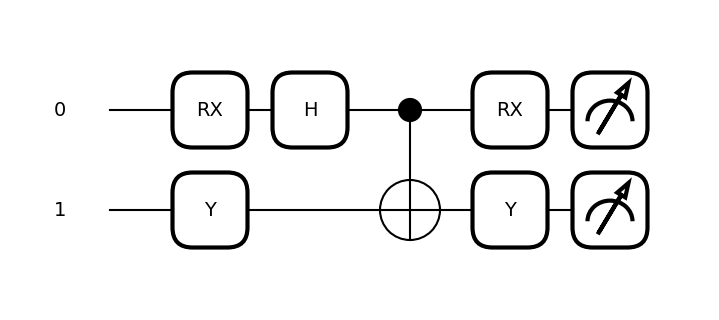

In [7]:
theta = 0.3
phi = 0.2
qml.draw_mpl(full_circuit)(theta,phi)

In [8]:
device1 = qml.device("default.qubit")
my_second_qnode = qml.QNode(full_circuit,device1)
print(my_second_qnode(theta,phi))

[ 0.69567381-0.10514081j -0.01054927+0.0698002j  -0.01054927-0.0698002j
 -0.69567381-0.10514081j]


#### **Examples**
It is not that easy as it is looking, Lets do some example exercises.

##### Create a Bell state using a subcircuit

(<Figure size 500x300 with 1 Axes>, <Axes: >)

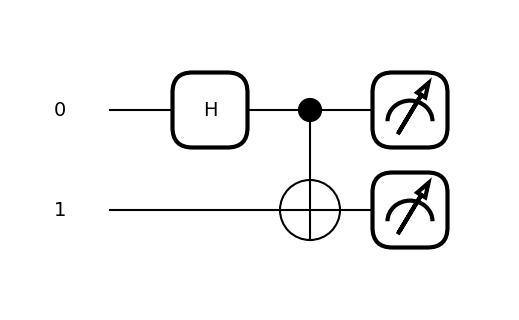

In [9]:
def entangle(wire_list):
    qml.Hadamard(wire_list[0])
    qml.CNOT(wires = wire_list)
@qml.qnode(device1)
def circuit():
    entangle([0,1])
    return qml.state()
qml.draw_mpl(circuit)()

In [10]:
print(circuit())

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


#### 🧩 Problem 1: Reusable Bell Pair Block

**Task:**

1. Create a subcircuit function `bell_pair(wire1, wire2)` that generates a Bell state:
   - Apply a Hadamard gate to `wire1`.
   - Then apply a CNOT from `wire1` to `wire2`.

2. In the main quantum circuit:
   - Use `bell_pair` on wires 0 and 1.
   - Use it again on wires 2 and 3.
   - Apply a CSWAP gate with control qubit 0, and target qubits 1 and 2.

**Instructions:**

- Return either the statevector (`qml.state()`) or the probabilities (`qml.probs(wires=[0, 1, 2, 3])`).
- Visualize the output to observe entanglement and interference between Bell pairs.

**Bonus:** Try printing the statevector and see which amplitudes are non-zero.

In [11]:
def sub(wire1,wire2):
    qml.Hadamard(wires = wire1)
    qml.CNOT(wires =[wire1,wire2])
d = qml.device("lightning.qubit", wires = 4)
@qml.qnode(d)
def main():
    sub(0,1)
    sub(2,3)
    qml.CSWAP(wires = [0,1,2])
    return qml.state()
print(main())

[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
 0. +0.j 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j]


(<Figure size 600x500 with 1 Axes>, <Axes: >)

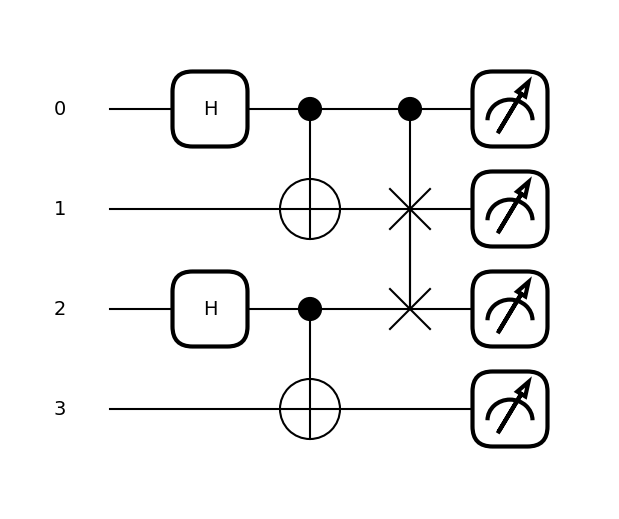

In [12]:
qml.draw_mpl(main)()

#### 🧩 Problem 2: Phase Kicker Block

**Task:**

1. Create a subcircuit `phase_kick(wire, theta)` that applies the following sequence:
   - Hadamard
   - RZ(θ)
   - Hadamard

2. In the main circuit:
   - Apply `phase_kick` to wires 0, 1, and 2 with different values of θ:
     - wire 0 → θ = π/4
     - wire 1 → θ = π/2
     - wire 2 → θ = π

**Instructions:**

- Return the statevector or probabilities for wires 0, 1, and 2.
- Compare how different phase kicks affect measurement results.


In [13]:
def phase_kick(wire, theta):
    qml.Hadamard(wires = wire)
    qml.RZ(theta, wires = wire)
    qml.Hadamard(wires = wire)
def main_func():
    phase_kick(0,np.pi / 4)
    phase_kick(1,np.pi / 2)
    phase_kick(2, np.pi)
    return qml.probs()
device = qml.device("default.qubit", wires = 3)
main_func_qnode = qml.QNode(main_func,device)
p = main_func_qnode()
# Lets chek whether the sum of probs is 1 or not ... 
sum = 0 
for i in range(len(p)):
    sum = sum + p[i]
print(sum)

0.999999999999999


(<Figure size 600x400 with 1 Axes>, <Axes: >)

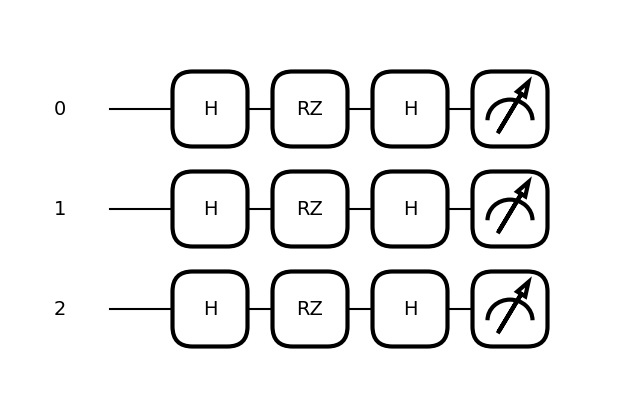

In [14]:
qml.draw_mpl(main_func)()